## Data Cleaning and Feature Engineering

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('uber.csv')  # Make sure the CSV is in the same folder
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### # Drop Unused Columns

In [3]:
# Drop columns that we don't need
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)


### Convert pickup_datetime to datetime object

In [4]:
# Convert pickup_datetime from string to datetime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')


### Check for missing values in each column


In [5]:
# Total missing values per column
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

### Check for basic info and data types

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 10.7 MB


### Describe the numerical columns

In [7]:
df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


### Check the range of fare amounts

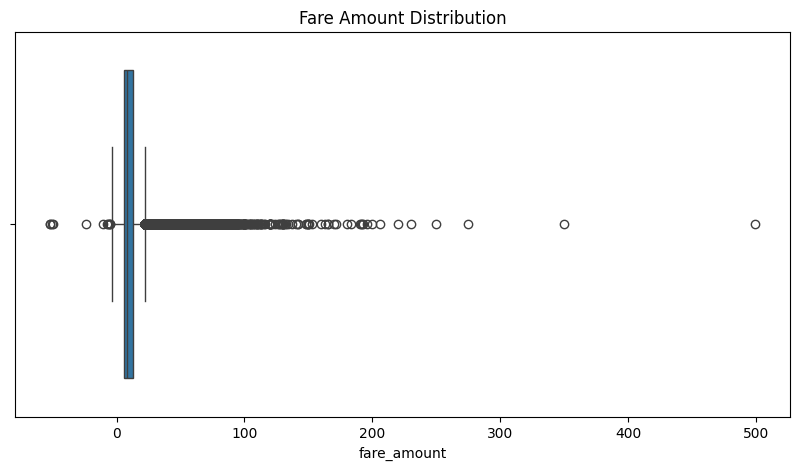

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['fare_amount'])
plt.title('Fare Amount Distribution')
plt.show()


### Look at passenger count distribution

In [9]:
df['passenger_count'].value_counts().sort_index()


passenger_count
0         709
1      138425
2       29428
3        8881
4        4276
5       14009
6        4271
208         1
Name: count, dtype: int64

### Visualize passenger count

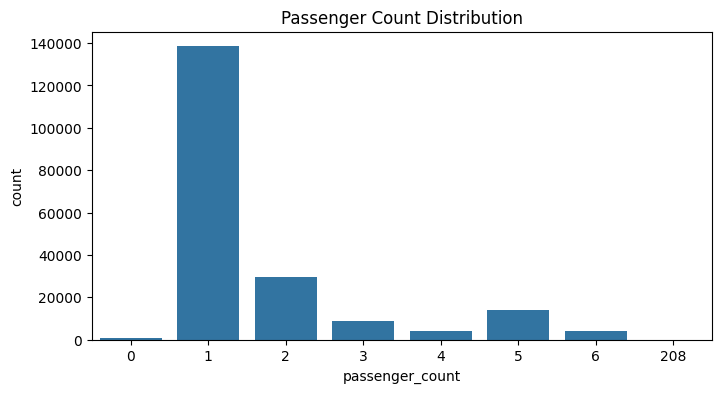

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x='passenger_count', data=df)
plt.title('Passenger Count Distribution')
plt.show()


### Check location ranges (latitude/longitude)

In [11]:
df[['pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude']].describe()


,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,200000.000000,200000.000000,199999.000000,199999.000000
mean,39.935885,-72.527638,39.923890,-72.525292
std,7.720539,11.437787,6.794829,13.117408
min,-74.015515,-1340.648410,-881.985513,-3356.666300
25%,40.734796,-73.992065,40.733823,-73.991407
50%,40.752592,-73.981823,40.753042,-73.980093
75%,40.767158,-73.967154,40.768001,-73.963658
max,1644.421482,57.418457,872.697628,1153.572603


### Remove missing values

In [12]:
df.dropna(inplace=True)


### Keep only valid fare amounts 
Greater than 0 and less than or equal to 300

In [13]:
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= 300)]


### Keep valid passenger counts

1 to 6 only

In [14]:
df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]


### Remove invalid lat/lon coordinates

Must be between -90 to 90 (latitude), -180 to 180 (longitude)

In [15]:
def is_valid_coord(lat, lon):
    return -90 <= lat <= 90 and -180 <= lon <= 180

df = df[
    df.apply(lambda row: is_valid_coord(row['pickup_latitude'], row['pickup_longitude']) and
                         is_valid_coord(row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
]


### Cleaned Dataset

In [16]:
df.shape     # Rows, columns
df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199254.000000,199254.000000,199254.000000,199254.000000,199254.000000,199254.000000
mean,11.365229,-72.504530,39.919368,-72.514765,39.923680,1.689437
std,9.816346,10.441031,6.127135,10.401827,6.113683,1.305389
min,0.010000,-93.824668,-74.015515,-75.458979,-74.015750,1.000000
25%,6.000000,-73.992063,40.734795,-73.991409,40.733828,1.000000
50%,8.500000,-73.981825,40.752582,-73.980094,40.753041,1.000000
75%,12.500000,-73.967162,40.767155,-73.963663,40.767995,2.000000
max,275.000000,40.808425,48.018760,40.831932,45.031598,6.000000


### Calculate distance_km (from pickup to dropoff)

We’ll use the Haversine formula (earth curvature aware)

In [24]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

df['distance_km'] = haversine_distance(
    df['pickup_latitude'], df['pickup_longitude'],
    df['dropoff_latitude'], df['dropoff_longitude']
)


### Extract hour from pickup_datetime

This helps model learn rush hour or night pricing patterns.

In [25]:
df['hour'] = df['pickup_datetime'].dt.hour


### Extract day_of_week (0 = Monday, 6 = Sunday)

 Helps differentiate weekday vs weekend demand.

In [26]:
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek


### Create is_weekend feature (1 if Saturday or Sunday)

Weekends often have different pricing behavior.

In [27]:
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)


### Create is_night feature (1 if trip is during night hours)

In [28]:
df['is_night'] = df['hour'].apply(lambda x: 1 if (x >= 22 or x <= 4) else 0)


### Visualize how fare changes with hour/distance

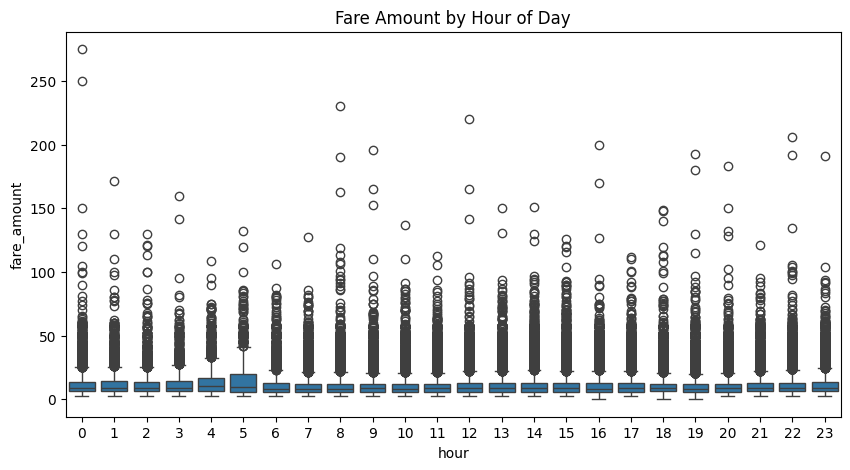

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x='hour', y='fare_amount', data=df)
plt.title('Fare Amount by Hour of Day')
plt.show()


### Data Preview

In [30]:
df[['fare_amount', 'distance_km', 'hour', 'day_of_week', 'is_weekend', 'is_night', 'passenger_count']].head()


,fare_amount,distance_km,hour,day_of_week,is_weekend,is_night,passenger_count
0,7.5,1.683323,19,3,0,0,1
1,7.7,2.457590,20,4,0,0,1
2,12.9,5.036377,21,0,0,0,1
3,5.3,1.661683,8,4,0,0,3
4,16.0,4.475450,17,3,0,0,5


## LINEAR REGRESSION MODEL


### Select Final Features for X

In [32]:
# Define input features (X)
X = df[['distance_km', 'passenger_count', 'hour', 'day_of_week', 'is_weekend', 'is_night']]

# Define target variable (y)
y = df['fare_amount']


### Split the Data into Training and Testing Sets

In [33]:
from sklearn.model_selection import train_test_split

# Split the data (random_state=42 ensures reproducibility)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Check the Sizes

In [34]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (159403, 6)
Testing set size: (39851, 6)


### Import and initialize the model

In [35]:
from sklearn.linear_model import LinearRegression

# Create the model instance
model = LinearRegression()


### Train the model (fit it to training data)

In [39]:
model.fit(X_train, y_train)


LinearRegression()

### Check model coefficients

In [40]:
# Print the coefficients and intercept
print("Intercept:", model.intercept_)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


Intercept: 11.364039451181334
           Feature  Coefficient
0      distance_km     0.000664
1  passenger_count     0.079004
2             hour    -0.026953
3      day_of_week     0.077641
4       is_weekend    -0.317449
5         is_night     0.305007


### Predict on test data

In [41]:
y_pred = model.predict(X_test)


### Evaluate the model’s performance

In [42]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): $6.05
R² Score: 0.0019


### Visualize actual vs predicted

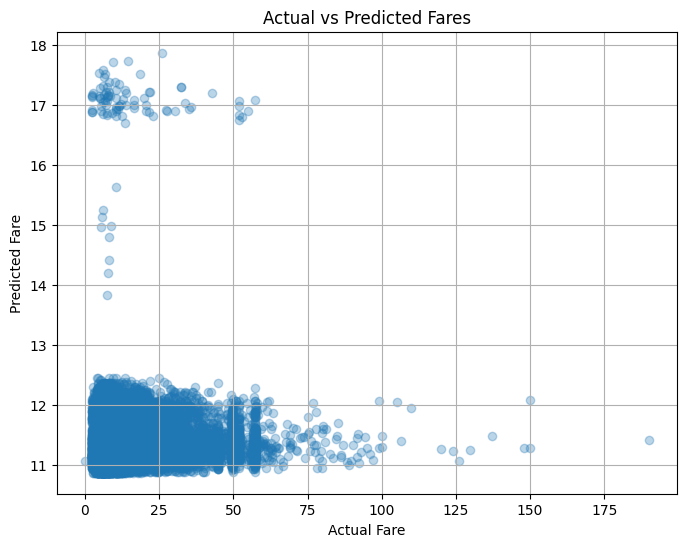

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fares")
plt.grid(True)
plt.show()


*Coefficients suggest the model is struggling to learn strong relationships — especially distance, which is expected to be the strongest predictor!

Mean Absolute Error (MAE): $6.05
Not terrible, but also not great

On average, the model is off by ~$6 per trip

R² Score: 0.0019 (≈ 0)
Indicates the model is not capturing any meaningful variance*



## Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [45]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [46]:
y_pred_rf = rf_model.predict(X_test)


In [47]:
from sklearn.metrics import mean_absolute_error, r2_score

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: ${mae_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.4f}")


Random Forest MAE: $2.65
Random Forest R² Score: 0.7296


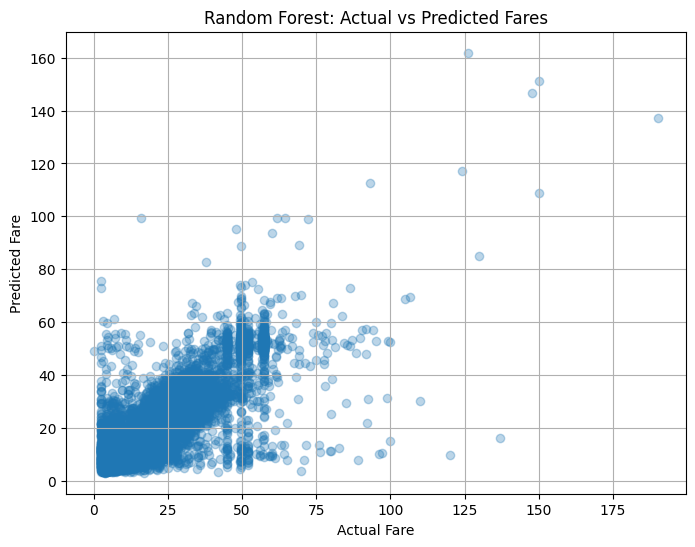

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Random Forest: Actual vs Predicted Fares")
plt.grid(True)
plt.show()


MAE is now $2.65, which means on average your predictions are only $2.65 away from the actual Uber fare — very good!

R² score is 0.7296 — meaning your model explains ~73% of the variance in fare prices. This is excellent for real-world, noisy data.



## XGBoost Regressor

In [49]:
pip install xgboost


4311.47s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


###  XGBoost Regressor using these tuned hyperparameters

In [53]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,         # More trees = better learning
    learning_rate=0.03,       # Slower learning = more precise
    max_depth=8,              # Deeper trees for complex patterns
    subsample=0.8,            # Avoid overfitting
    colsample_bytree=0.8,     # Random feature sampling per tree
    reg_lambda=1.0,           # L2 regularization (helps generalization)
    reg_alpha=0.3,            # L1 regularization (helps pruning)
    random_state=42
)



### Train

In [54]:
xgb_model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

### Evaluation 

In [55]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred_xgb = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"Tuned XGBoost MAE: ${mae:.2f}")
print(f"Tuned XGBoost R² Score: {r2:.4f}")



Tuned XGBoost MAE: $2.48
Tuned XGBoost R² Score: 0.7226


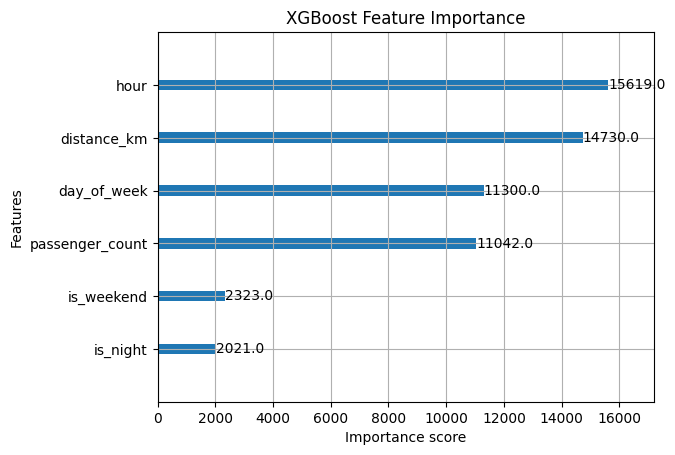

In [56]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_model)
plt.title("XGBoost Feature Importance")
plt.show()


**This model is the best fit for our project, so we will do further work by using XGBOOST model.**

##  Save Trained XGBoost Model as .pkl for Backend Integration


### Install joblib

In [57]:
pip install joblib


5320.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Save the model

In [58]:
import joblib

# Save the model to a file
joblib.dump(xgb_model, 'fare_prediction_model.pkl')


['fare_prediction_model.pkl']

### Load the model to test it

In [59]:
# Later you can load it like this:
loaded_model = joblib.load('fare_prediction_model.pkl')

# Try predicting again
test_prediction = loaded_model.predict(X_test[:5])
print("Sample predictions:", test_prediction)


Sample predictions: [23.763695   4.61161    5.5686607 11.349793  15.106811 ]


In [60]:
pip install fastapi uvicorn joblib scikit-learn


5494.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached fastapi-0.115.12-py3-none-any.whl.metadata (27 kB)
  Using cached uvicorn-0.34.2-py3-none-any.whl.metadata (6.5 kB)
  Using cached starlette-0.46.2-py3-none-any.whl.metadata (6.2 kB)
  Using cached pydantic-2.11.4-py3-none-any.whl.metadata (66 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.33.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Using cached typing_inspection-0.4.0-py3-none-any.whl.metadata (2.6 kB)
Using cached fastapi-0.115.12-py3-none-any.whl (95 kB)
Using cached uvicorn-0.34.2-py3-none-any.whl (62 kB)
Using cached pydantic-2.11.4-py3-none-any.whl (443 kB)
Using cached pydantic_core-2.33.2-cp311-cp311-macosx_11_0_arm64.whl (1.9 MB)
Using cached starlette-0.46.2-py3-none-any.whl (72 kB)
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
Using cached typing_inspection-0.4.0-py3-none-any.whl (14 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: 